In [4]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pickle
import os
import shutil
warnings.filterwarnings("ignore") 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = pd.read_csv("/content/drive/MyDrive/glass.data",na_values="?", names = ["Id Number", "Refractive Index", "Sodium (Na)", "Magnesium (Mg)", "Aluminium (Al)", "Silicon (Si)", "Potassium (K)", "Calcium (Ca)", "Barium (Ba)", "Iron (Fe)", "Type of Glass"])
data.head()

,Id Number,Refractive Index,Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
data.describe()

,Id Number,Refractive Index,Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [29]:
data.shape

(214, 11)

In [14]:
X = data.drop(['Type of Glass'],axis=1)
y = data['Type of Glass']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [31]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_train)
X_scaled = pd.DataFrame(X_scaled,columns=x_train.columns)

In [32]:
X_scaled

,Id Number,Refractive Index,Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe)
0,-0.084416,-0.065886,-0.977833,0.036270,-1.261262,1.548871,-0.238790,0.321588,-0.347520,1.336393
1,-0.660508,1.014238,-0.428012,0.657881,-1.179798,-0.403810,-0.471127,0.620002,-0.347520,1.045157
2,-1.697474,-0.319650,-0.146709,0.636928,-0.426257,0.592188,0.051630,-0.615294,-0.347520,-0.605181
3,0.771492,-0.475812,-0.670957,0.608991,-0.283695,-0.023758,0.138757,-0.115624,-0.347520,-0.605181
4,-0.331313,-0.635228,0.019516,0.546131,0.143991,0.028663,0.225883,-0.608354,-0.347520,0.365606
...,...,...,...,...,...,...,...,...,...,...
166,-1.039083,-0.176501,-0.837181,0.504225,-0.528087,0.421820,0.153278,-0.136443,-0.347520,2.307180
167,0.096641,0.168358,0.096235,0.783601,-0.385525,-0.102390,0.080672,-0.518136,-0.347520,0.753921
168,1.660319,-0.651495,1.259810,-1.891425,2.628642,0.290768,-0.747027,0.342407,0.765170,-0.605181
169,1.561561,-1.061422,1.873564,-1.891425,1.976930,1.430924,-0.747027,-0.393218,0.806381,-0.605181


In [49]:
from sklearn.neighbors import KNeighborsClassifier
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [51]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9941520467836257, 1.0]
3 : [0.9941520467836257, 1.0]
4 : [0.9883040935672515, 1.0]
5 : [0.9883040935672515, 1.0]
6 : [0.9883040935672515, 1.0]
7 : [0.9941520467836257, 1.0]
8 : [0.9941520467836257, 1.0]
9 : [0.9883040935672515, 0.9767441860465116]
10 : [0.9941520467836257, 0.9767441860465116]
11 : [0.9941520467836257, 0.9767441860465116]
12 : [0.9883040935672515, 0.9767441860465116]
13 : [0.9824561403508771, 0.9767441860465116]
14 : [0.9707602339181286, 0.9767441860465116]
15 : [0.9707602339181286, 0.9302325581395349]
16 : [0.9707602339181286, 0.9302325581395349]
17 : [0.9649122807017544, 0.9302325581395349]
18 : [0.9590643274853801, 0.9302325581395349]
19 : [0.9590643274853801, 0.9302325581395349]
20 : [0.9532163742690059, 0.9302325581395349]


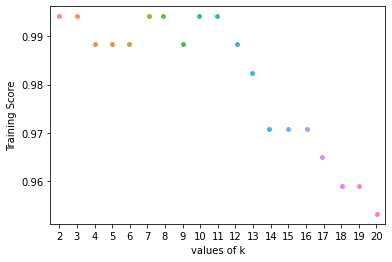

In [52]:

ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

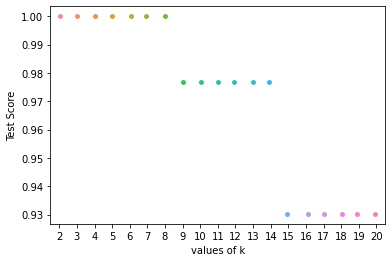

In [53]:

ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

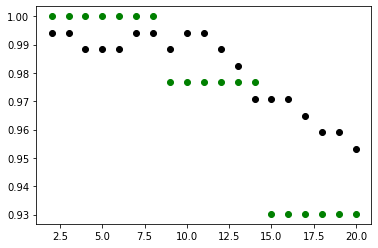

In [54]:

plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV
def plot_search_results(grid):
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [78]:
def GridSearchForKnn(train_x, train_y):
    try:
        clf = KNeighborsClassifier()
        param_grid_knn = {"weights": ['uniform', 'distance'],
                          'n_neighbors': range(2, 10),
                          "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                          "leaf_size": range(15, 30, 3),
                          "p" : range(1, 5),
                          "n_jobs" : range(1,10, 2),
                          }
        grid = GridSearchCV(clf, param_grid_knn, verbose=3,cv=2, return_train_score = True)
        grid.fit(x_train, y_train)
        return grid

    except Exception as e:
      print(e)

In [79]:
grid = GridSearchForKnn(x_train, y_train)


weights = grid.best_params_['weights']
n_neighbors = grid.best_params_['n_neighbors']
algorithm = grid.best_params_['algorithm']
leaf_size  = grid.best_params_['leaf_size']
p = grid.best_params_['p']
n_jobs = grid.best_params_['n_jobs']

Streaming output truncated to the last 5000 lines.
[CV 1/2] END algorithm=kd_tree, leaf_size=21, n_jobs=1, n_neighbors=9, p=3, weights=uniform;, score=(train=0.965, test=0.930) total time=   0.0s
[CV 2/2] END algorithm=kd_tree, leaf_size=21, n_jobs=1, n_neighbors=9, p=3, weights=uniform;, score=(train=0.953, test=0.953) total time=   0.0s
[CV 1/2] END algorithm=kd_tree, leaf_size=21, n_jobs=1, n_neighbors=9, p=3, weights=distance;, score=(train=1.000, test=0.977) total time=   0.0s
[CV 2/2] END algorithm=kd_tree, leaf_size=21, n_jobs=1, n_neighbors=9, p=3, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/2] END algorithm=kd_tree, leaf_size=21, n_jobs=1, n_neighbors=9, p=4, weights=uniform;, score=(train=0.965, test=0.930) total time=   0.0s
[CV 2/2] END algorithm=kd_tree, leaf_size=21, n_jobs=1, n_neighbors=9, p=4, weights=uniform;, score=(train=0.953, test=0.953) total time=   0.0s
[CV 1/2] END algorithm=kd_tree, leaf_size=21, n_jobs=1, n_neighbors=9, p=4, w

In [77]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00284314, 0.00222051, 0.00220859, ..., 0.00342107, 0.00352299,
       0.00301492]), 'std_fit_time': array([5.56707382e-04, 6.79492950e-06, 7.59363174e-05, ...,
       1.38282776e-05, 1.54376030e-04, 2.01821327e-04]), 'mean_score_time': array([0.0046128 , 0.00242686, 0.00456738, ..., 0.1050725 , 0.10748601,
       0.1057024 ]), 'std_score_time': array([2.02298164e-04, 1.35898590e-05, 2.32934952e-04, ...,
       5.72204590e-06, 3.94821167e-04, 5.56468964e-04]), 'param_algorithm': masked_array(data=['auto', 'auto', 'auto', ..., 'brute', 'brute', 'brute'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_leaf_size': masked_array(data=[15, 15, 15, ..., 27, 27, 27],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_n_jobs': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
             mask=[False, False, False, ..., False, F

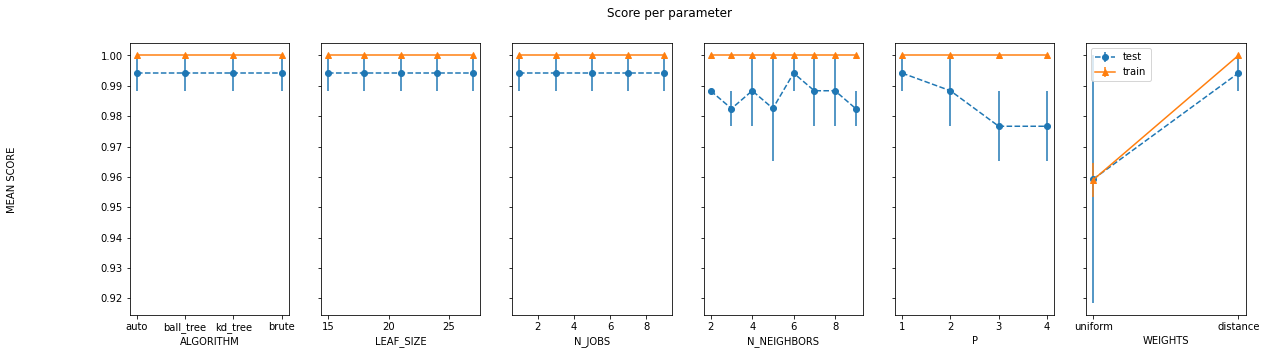

In [80]:
plot_search_results(grid)